### The dataset shall be cleaned through following process
1. Checking number of columns
2. checking missing values
3. checking duplicate values
4. checking for outliers

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns

In [19]:
# Read the file

df = pd.read_csv("states.csv")

In [6]:
import os

In [20]:
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [21]:
# Checking for columns
df.columns

Index(['State', 'Uninsured Rate (2010)', 'Uninsured Rate (2015)',
       'Uninsured Rate Change (2010-2015)',
       'Health Insurance Coverage Change (2010-2015)',
       'Employer Health Insurance Coverage (2015)',
       'Marketplace Health Insurance Coverage (2016)',
       'Marketplace Tax Credits (2016)', 'Average Monthly Tax Credit (2016)',
       'State Medicaid Expansion (2016)', 'Medicaid Enrollment (2013)',
       'Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)',
       'Medicare Enrollment (2016)'],
      dtype='object')

In [22]:
# To check for the missing values
df.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      2
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

In [23]:
# Replace the missing values
mean_value = df["Medicaid Enrollment (2013)"].mean()

In [24]:
mean_value

2255699.08

In [25]:
# Using the mean value to replace the records
df["Medicaid Enrollment (2013)"].fillna(mean_value,inplace = True)

In [26]:
# To confirm the change
df.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 1
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          2
Medicare Enrollment (2016)                      0
dtype: int64

In [27]:
# Dropping the missing values of other columns
df1 = df.dropna()
df1.isnull().sum()

State                                           0
Uninsured Rate (2010)                           0
Uninsured Rate (2015)                           0
Uninsured Rate Change (2010-2015)               0
Health Insurance Coverage Change (2010-2015)    0
Employer Health Insurance Coverage (2015)       0
Marketplace Health Insurance Coverage (2016)    0
Marketplace Tax Credits (2016)                  0
Average Monthly Tax Credit (2016)               0
State Medicaid Expansion (2016)                 0
Medicaid Enrollment (2013)                      0
Medicaid Enrollment (2016)                      0
Medicaid Enrollment Change (2013-2016)          0
Medicare Enrollment (2016)                      0
dtype: int64

In [29]:
# Checking the information concerning dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 50
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         49 non-null     object 
 1   Uninsured Rate (2010)                         49 non-null     object 
 2   Uninsured Rate (2015)                         49 non-null     object 
 3   Uninsured Rate Change (2010-2015)             49 non-null     object 
 4   Health Insurance Coverage Change (2010-2015)  49 non-null     int64  
 5   Employer Health Insurance Coverage (2015)     49 non-null     int64  
 6   Marketplace Health Insurance Coverage (2016)  49 non-null     int64  
 7   Marketplace Tax Credits (2016)                49 non-null     int64  
 8   Average Monthly Tax Credit (2016)             49 non-null     object 
 9   State Medicaid Expansion (2016)               49 non-null     objec

C:\Users\niran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employer Health Insurance Coverage (2015)'>

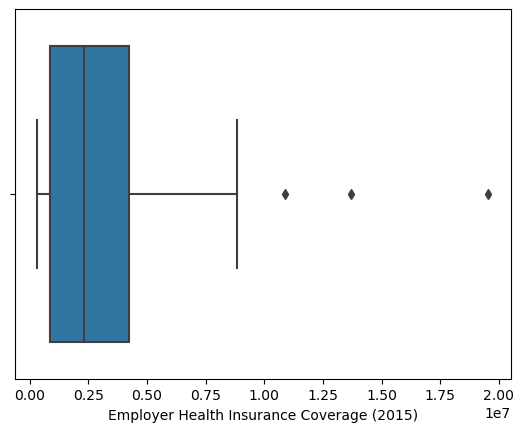

In [33]:
# Check for outliers in the dataset
sns.boxplot(df1["Employer Health Insurance Coverage (2015)"])

In [35]:
# Choose the maximum quantile for outliers
max_cr = df1["Employer Health Insurance Coverage (2015)"].quantile(0.995)
max_cr

18149679.99999999

In [36]:
df1[df1["Employer Health Insurance Coverage (2015)"] > max_cr]

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [37]:
#Assigning new data to a new data frame 

df2 = df1[df1["Employer Health Insurance Coverage (2015)"] < max_cr]

C:\Users\niran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Employer Health Insurance Coverage (2015)'>

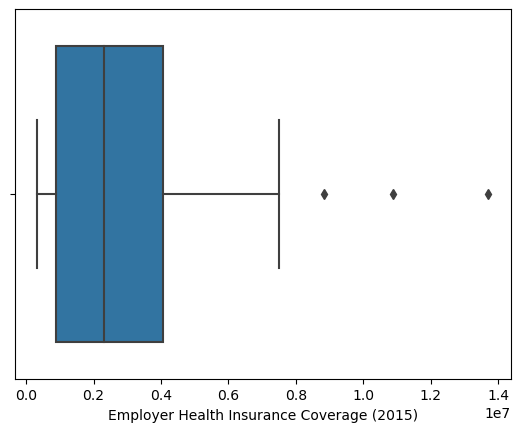

In [38]:
# To confirm the change
sns.boxplot(df2["Employer Health Insurance Coverage (2015)"])

In [39]:
# Checking for duplicate values
df2.duplicated()

0     False
1     False
2     False
3     False
5     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
dtype: bool

In [40]:
df3 = df2.drop_duplicates()

In [41]:
# to confirm the change
df3.duplicated().sum()

0

In [42]:
# saving new dataset into csv file
df3.to_csv("Cleaned_data2.csv")